# 🖼️ Text-to-Image Generation using Stable Diffusion XL  
**Author:** Shan Ali  
**Platform:** Google Colab  
**Model:** Stable Diffusion XL (SDXL)  
**Libraries:** 🤗 Transformers | Diffusers | Torch | Hugging Face  

---

## 📘 Project Overview

This notebook demonstrates **Text-to-Image Generation** using **Stable Diffusion XL (SDXL)**, a state-of-the-art deep learning model by Stability AI.  
The model converts **text prompts** into **high-quality images** using diffusion-based generative techniques.

You’ll learn to:  
1. Install and import the required libraries.  
2. Load the **Stable Diffusion XL pretrained model** from Hugging Face.  
3. Generate images from custom text prompts.  
4. Adjust parameters such as **image style**, **height**, **width**, and **guidance scale**.  
5. Explore how diffusion models gradually generate realistic visuals from random noise.

---

## 🧑‍💻 About the Author

**Shan Ali** is a data science and AI enthusiast with hands-on experience in **machine learning**, **deep learning**, and **computer vision** projects.  
He actively shares his work and insights on GitHub, Kaggle, and LinkedIn.  

---

## 🔗 Connect & Explore More

[![GitHub](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Mehar-shan/Generative_AI_and_LLMs_Projects)  
[![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/meharshanali)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/shan-ali-3a2528350/)  
[![Facebook](https://img.shields.io/badge/Facebook-1877F2?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/profile.php?id=61578892410964)

---

## 🧩 Objective

The goal of this notebook is to **transform text prompts into creative visual outputs** using **Hugging Face’s Stable Diffusion XL** model.  
This workflow combines the power of **Transformer-based tokenization**, **text encoding**, and **diffusion-based image generation** — making it an ideal starting point for AI art, generative media, and creative design applications.


In [1]:
!nvidia-smi

Wed Oct  8 10:28:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 📦 Step 1: Import Libraries

In [2]:
!pip install -q diffusers transformers accelerate safetensors huggingface_hub

## 🔐 Step 2: Login to Hugging Face

In [3]:
from huggingface_hub import login
login(token="here add your token api")


## ⚙️ Step 3: Load the Pretrained SDXL Model

In [4]:
# Step 3: Load a pretrained text-to-image model
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)

pipe.enable_attention_slicing()   # helps with low VRAM


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


## 🖼️ Step 4: Generate Your First Image

  0%|          | 0/30 [00:00<?, ?it/s]

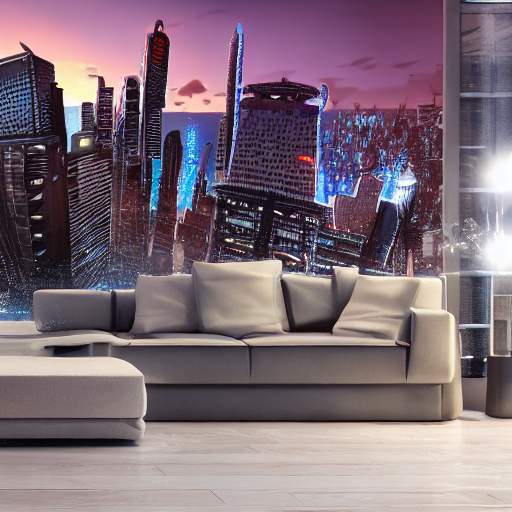

In [5]:
prompt = "A futuristic cityscape at sunset, ultra-detailed, cinematic lighting"
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
image.save("sample.png")
image


In [6]:
tokens = pipe.tokenizer(prompt, return_tensors="pt", padding="max_length", truncation=True)
print("Token IDs:", tokens.input_ids[0][:20])


Token IDs: tensor([49406,   320, 30987, 40808,   536,  3424,   267,  8118,   268, 12609,
          267, 25602,  5799, 49407, 49407, 49407, 49407, 49407, 49407, 49407])


## 🧠 Step 6: Create a Reusable Function

In [7]:
def generate_image(prompt, style=None, width=512, height=512, steps=30,
                   guidance=7.5, seed=None, negative=None):
    full_prompt = f"{style} {prompt}" if style else prompt
    generator = torch.Generator(device=device).manual_seed(seed) if seed else None

    result = pipe(
        full_prompt,
        height=height,
        width=width,
        num_inference_steps=steps,
        guidance_scale=guidance,
        negative_prompt=negative,
        generator=generator,
    )
    return result.images[0]


## 💡 Step 8: Experiment with Different Prompts

  0%|          | 0/30 [00:00<?, ?it/s]

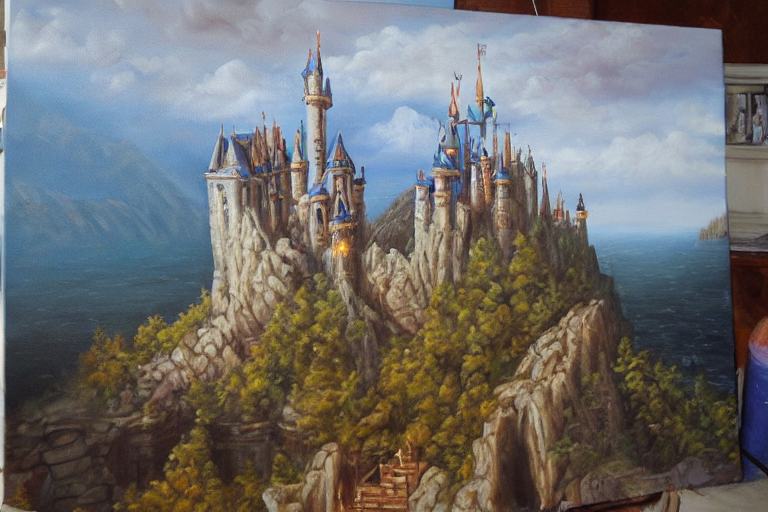

In [8]:
img = generate_image(
    "A fantasy castle on a cliff",
    style="oil painting",
    width=768,
    height=512,
    seed=42
)
img
